In [4]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#loading  train dataset
pd.set_option('display.max_columns',None) # to disply all columns
df=pd.read_csv('SalaryData_Train(1).csv')
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [6]:
df.shape

(30161, 14)

train dataset has 30161 rows and 14 columns,that so big

In [7]:
#loading test dataset
pd.set_option('display.max_columns',None) # to disply all columns
df1=pd.read_csv('SalaryData_Test(1).csv')
df1.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [8]:
df1.shape

(15060, 14)

test dataset has 15060 rows and 14 columns

# lets do some analysis on train dataset

In [9]:
# checking duplicate columns
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


No Missing values and datatype also identified accuretly

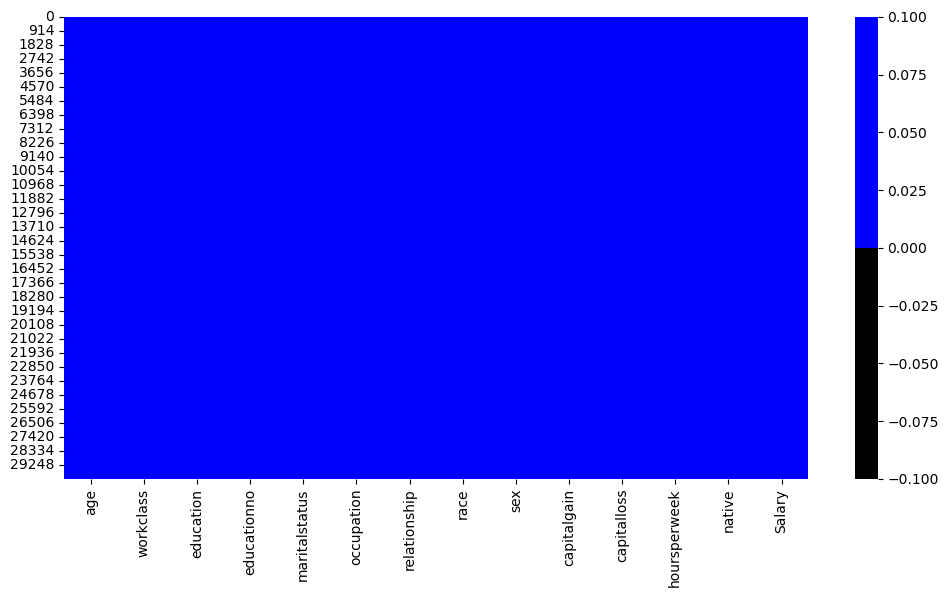

In [11]:
# Plot the heatmap to find more about Missing values

plt.figure(figsize=(12,6))
cols=df.columns
colors=['black','blue']

sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colors))
plt.show();

In [12]:
# missing value by applying function
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
# checking unique category in each column of dataset
df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

train dataset has 9 categorical columns ehic has repetitive values and 5 numerical columns which has contineous values.

In [14]:
# Summary of numerical attributes:
# In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


describe function shows only numerical columns information,Lets check outliers with the help of boxplot The features are not on the same scale. For example capitalgain has a mean of 1092 while capitalloss has a mean value of 88. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

In [15]:
# checking duplicate rows
df.duplicated().sum()

3258

train dataset has 3258 duplicate rows,so we need to drop them to train model accuratly.

In [16]:
# droping duplicate rows
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

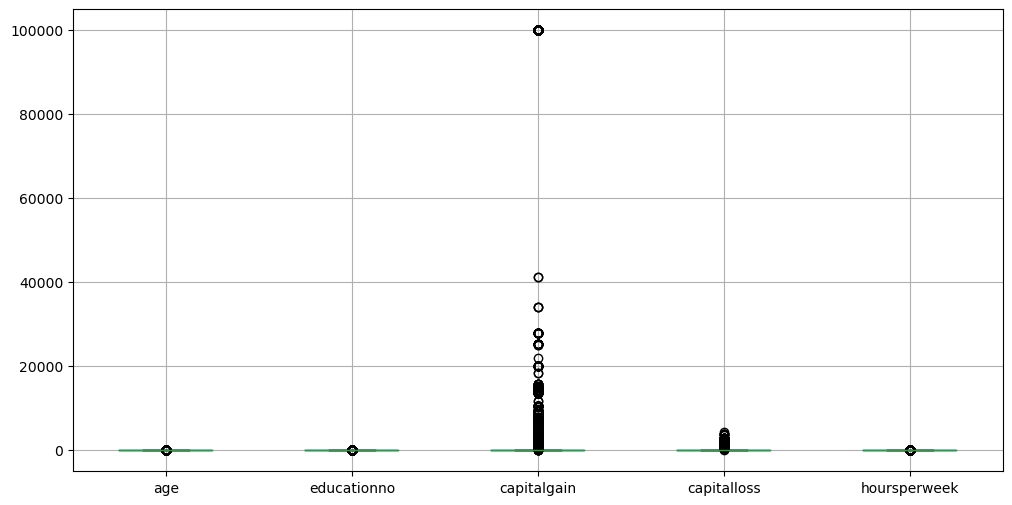

In [18]:
# Lets check outliers with boxplot
plt.figure(figsize=(12,6))
df.boxplot()
plt.show();

it seems their are so many outliers in each column so lets treat them one by one

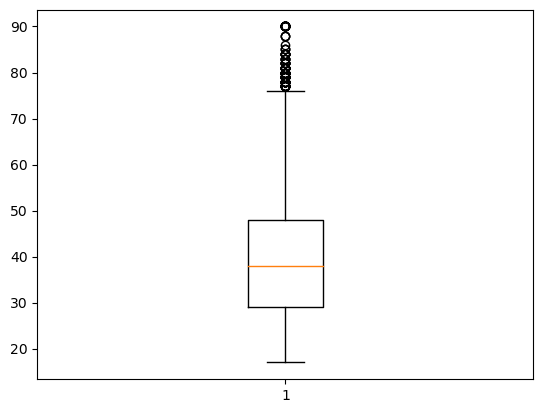

In [19]:
box=plt.boxplot(df['age'])
plt.show();

above boxplot has majority of age is inbetween 30 to 48 And distribution is right skewed with lot of outliers on upper limit

for treating outliers their are two methods

1.finding outlier points and delete one by one or delecting data from upper and lower limit of boxplot.

2.Capping/Winsorization=Replacing outliers with their respective upper and lower limit values

For lots of data we use Winsorization and for low outliers we directly delete them

In [20]:
# applying winsorization with (99% and 1%) for outliers
upper_limit=df['age'].quantile(0.99)
lower_limit=df['age'].quantile(0.01)
df['age']=np.where(df['age'] >= upper_limit,upper_limit,
    np.where(df['age']<= lower_limit,lower_limit,df['age']))

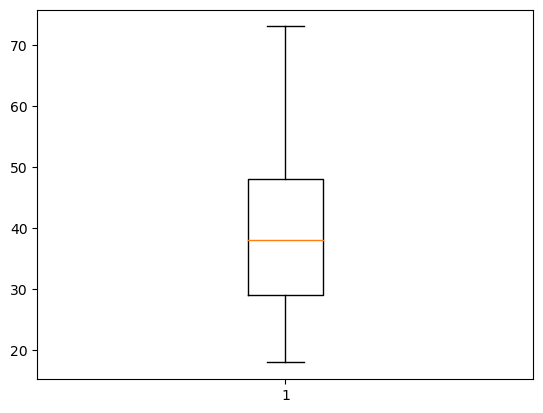

In [21]:
box=plt.boxplot(df['age'])
plt.show();

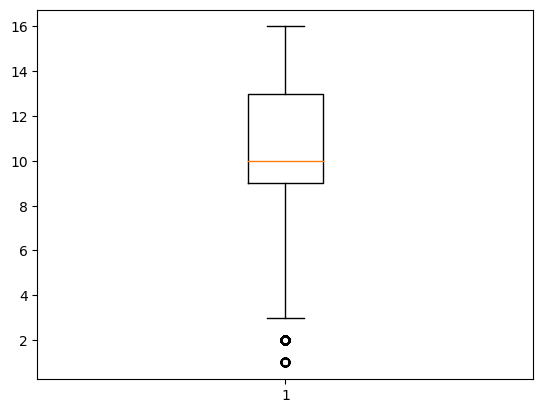

In [22]:
box1=plt.boxplot(df['educationno'])
plt.show();

distribution is left skewed with majority of data is between 9 to 13 with few outliers on lower limit of boxplot

In [23]:
# for few outlier we can delete directly
#Lets extract Outlier values first
[x.get_ydata() for x in box1['fliers']]

[array([1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
        1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1], dtype=int64)]

In [24]:
#deleting Outliers
df=df[df['educationno'] != 1]
df=df[df['educationno'] != 2]

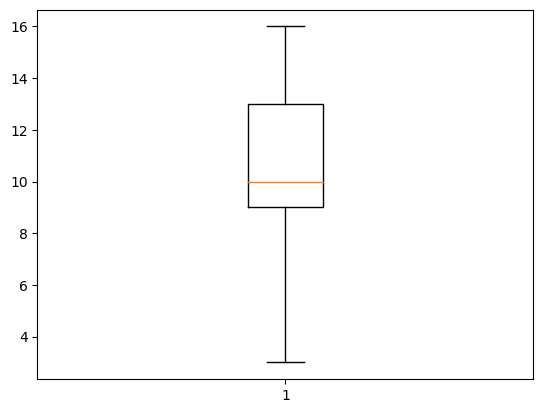

In [25]:
box1=plt.boxplot(df['educationno'])
plt.show();

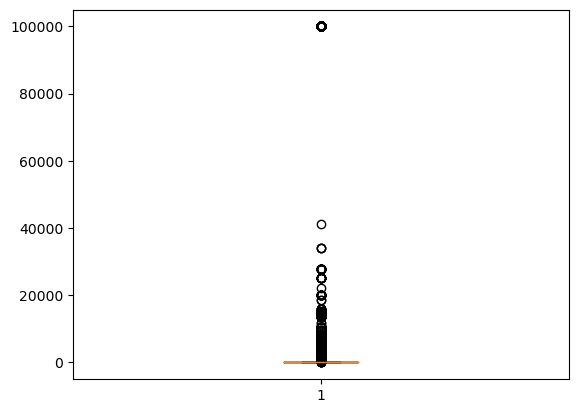

In [26]:
box2=plt.boxplot(df['capitalgain'])
plt.show();

In [27]:
#deleting extreme one  Outlier
df=df[df['capitalgain'] != 99999]

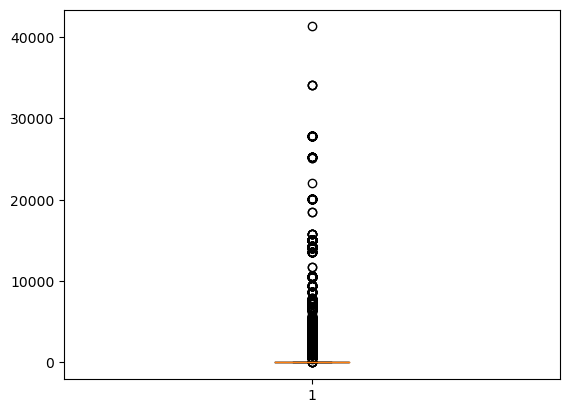

In [28]:
box2=plt.boxplot(df['capitalgain'])
plt.show();

In [29]:
# Lets extract other Outlier values
[x.get_ydata() for x in box2['fliers']]

[array([ 2174, 14084,  5178, ..., 15020,  1086, 15024], dtype=int64)]

In [30]:
# applying winsorization for other outliers
upper_limit=df['capitalgain'].quantile(0.95)
lower_limit=df['capitalgain'].quantile(0.05)
df['capitalgain']=np.where(df['capitalgain'] >= upper_limit,upper_limit,
    np.where(df['capitalgain']<= lower_limit,lower_limit,df['capitalgain']))

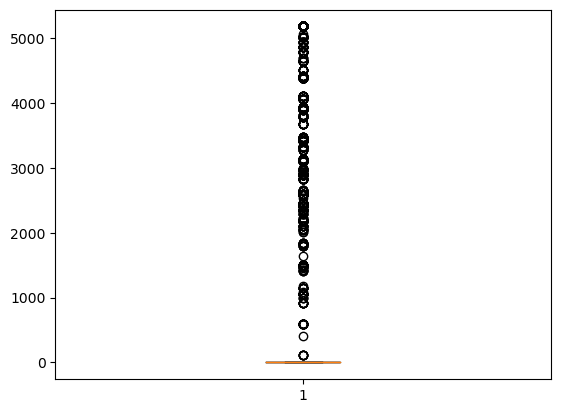

In [31]:
box2=plt.boxplot(df['capitalgain'])
plt.show();

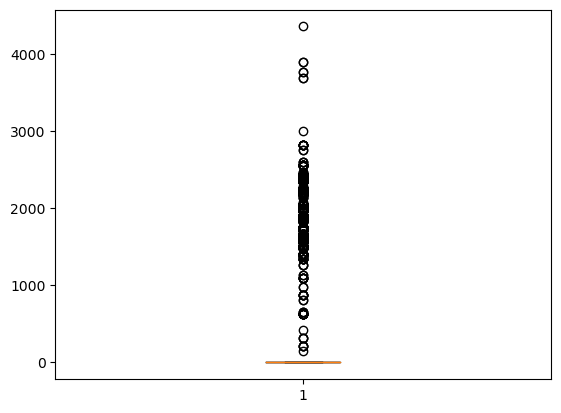

In [32]:
box3=plt.boxplot(df['capitalloss'])
plt.show();

In [33]:
# applying winsorization for other outliers
upper_limit=df['capitalloss'].quantile(0.95)
lower_limit=df['capitalloss'].quantile(0.05)
df['capitalloss']=np.where(df['capitalloss'] >= upper_limit,upper_limit,
    np.where(df['capitalloss']<= lower_limit,lower_limit,df['capitalloss']))

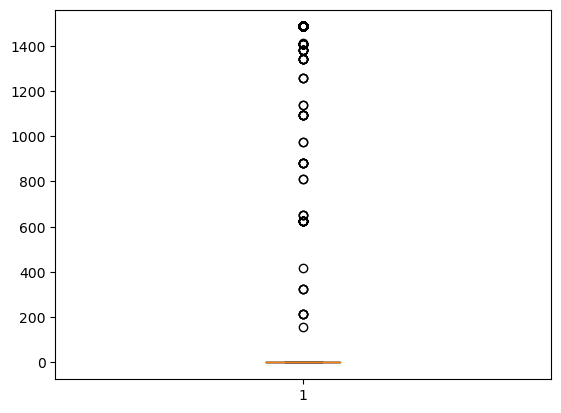

In [34]:
box4=plt.boxplot(df['capitalloss'])
plt.show();

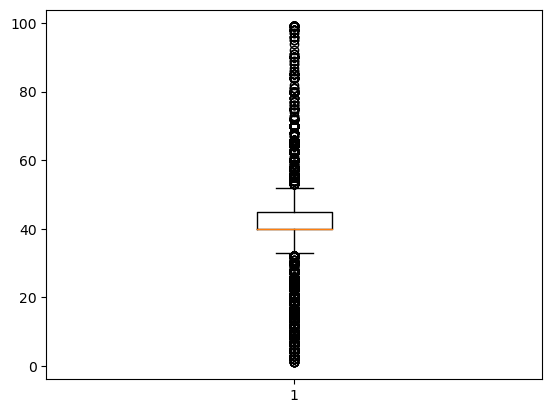

In [35]:
box4=plt.boxplot(df['hoursperweek'])
plt.show();

distribution has outliers on both side with almost normally disributed has mean value 42

In [36]:
# applying winsorization for other outliers
upper_limit=df['hoursperweek'].quantile(0.95)
lower_limit=df['hoursperweek'].quantile(0.05)
df['hoursperweek']=np.where(df['hoursperweek'] >= upper_limit,upper_limit,
    np.where(df['hoursperweek']<= lower_limit,lower_limit,df['hoursperweek']))

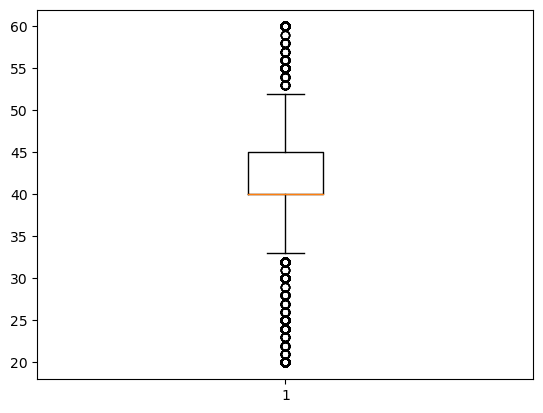

In [37]:
box=plt.boxplot(df['hoursperweek'])
plt.show();

In [38]:
# data transformation
df.skew()

C:\Users\PallaviJadhav\AppData\Local\Temp\ipykernel_4336\4209787060.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age             0.438970
educationno    -0.202691
capitalgain     3.190121
capitalloss     4.022507
hoursperweek   -0.152368
dtype: float64

capitalgain and capitalloss has high skew values

<Figure size 1200x600 with 0 Axes>

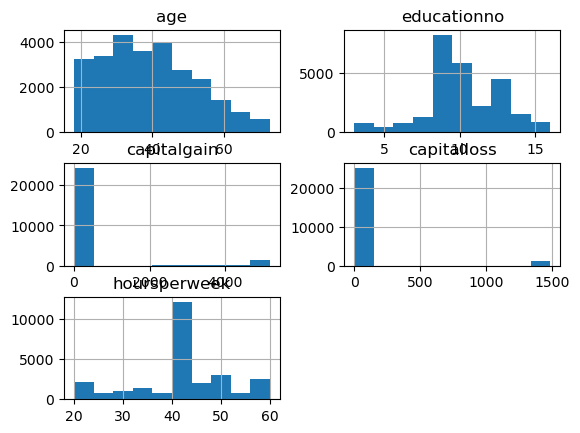

In [39]:
# lets see skewness with the help of histogram
plt.figure(figsize=(12,6))
df.hist()
plt.show();

applying sqrt on both capitalgain and capitalloss column

In [40]:
df['capitalgain']=np.sqrt(df['capitalgain'])

In [41]:
df['capitalgain']=np.sqrt(df['capitalgain'])

In [42]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,6.828336,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,20.0,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53.0,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,40.0,United-States,>50K
30155,22.0,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
30156,27.0,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38.0,United-States,<=50K
30158,58.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40.0,United-States,<=50K


# now lets do same analysis on test data too

In [43]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

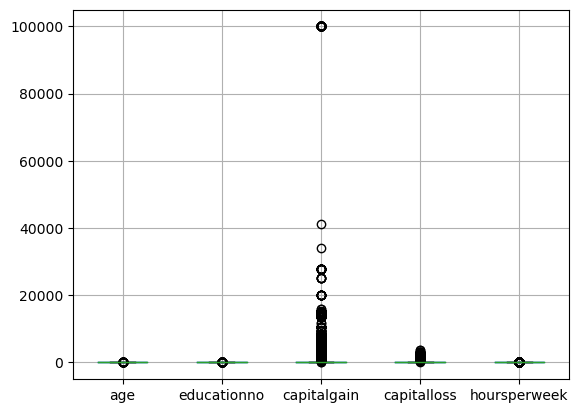

In [44]:
df1.boxplot()
plt.show()

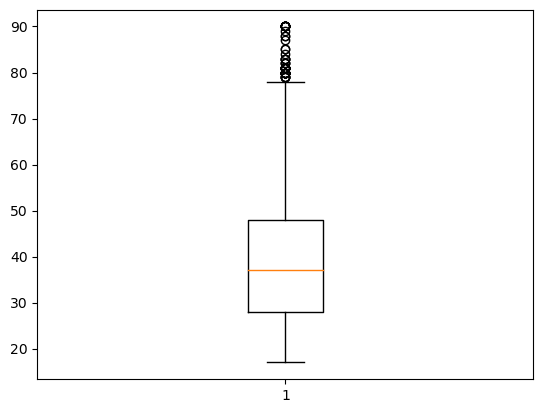

In [45]:
box=plt.boxplot(df1['age'])
plt.show();

In [46]:
# applying winsorization for other outliers
upper_limit=df1['age'].quantile(0.99)
lower_limit=df1['age'].quantile(0.01)
df1['age']=np.where(df1['age'] >= upper_limit,upper_limit,
    np.where(df1['age']<= lower_limit,lower_limit,df1['age']))

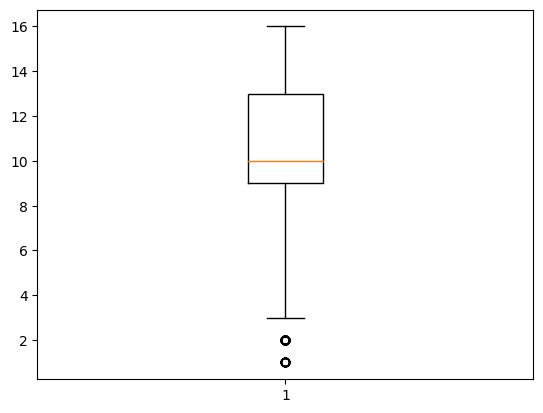

In [47]:
box1=plt.boxplot(df1['educationno'])
plt.show();

In [48]:
# Lets extract Outlier values
[x.get_ydata() for x in box1['fliers']]

[array([2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int64)]

In [49]:
#deleting extreme Outliers
df1=df1[df1['educationno'] != 1]
df1=df1[df1['educationno'] != 2]

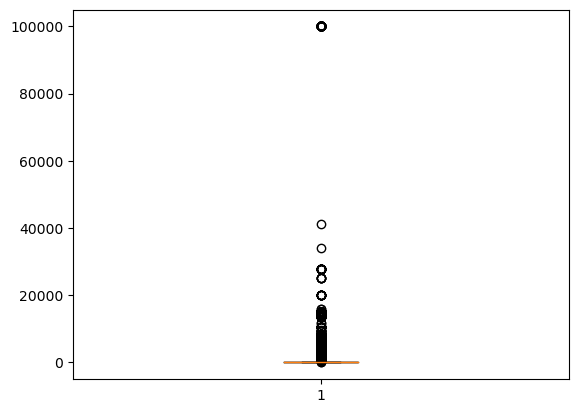

In [50]:
box2=plt.boxplot(df1['capitalgain'])
plt.show();

In [51]:
# Lets extract Outlier values
[x.get_ydata() for x in box2['fliers']]

[array([ 7688,  3103,  6418, ...,  7688, 15024,  5455], dtype=int64)]

In [52]:
#deleting extreme Outliers
df1=df1[df1['capitalgain'] != 99999]

In [53]:
# applying winsorization for other outliers
upper_limit=df1['capitalgain'].quantile(0.95)
lower_limit=df1['capitalgain'].quantile(0.05)
df1['capitalgain']=np.where(df1['capitalgain'] >= upper_limit,upper_limit,
    np.where(df1['capitalgain']<= lower_limit,lower_limit,df1['capitalgain']))

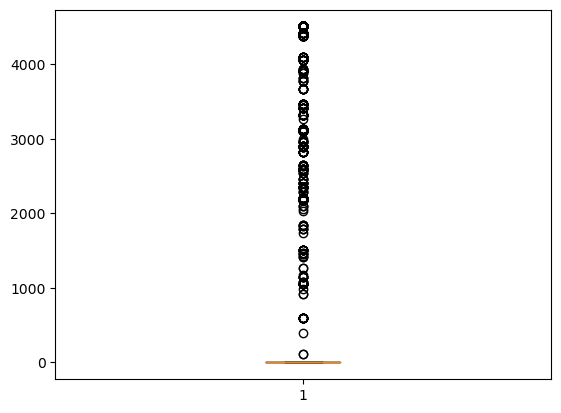

In [54]:
box2=plt.boxplot(df1['capitalgain'])
plt.show();

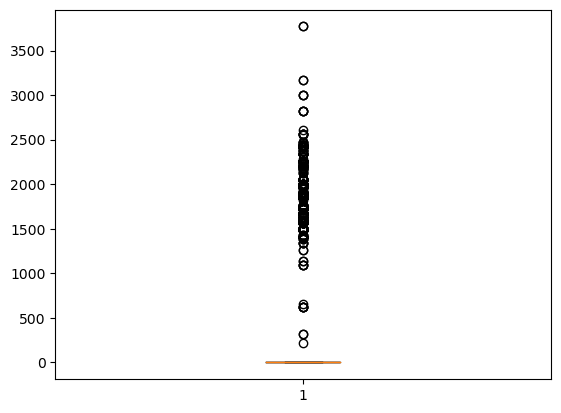

In [55]:
box3=plt.boxplot(df1['capitalloss'])
plt.show();

In [56]:
# applying winsorization for other outliers
upper_limit=df1['capitalloss'].quantile(0.95)
lower_limit=df1['capitalloss'].quantile(0.05)
df1['capitalloss']=np.where(df1['capitalloss'] >= upper_limit,upper_limit,
    np.where(df1['capitalloss']<= lower_limit,lower_limit,df1['capitalloss']))

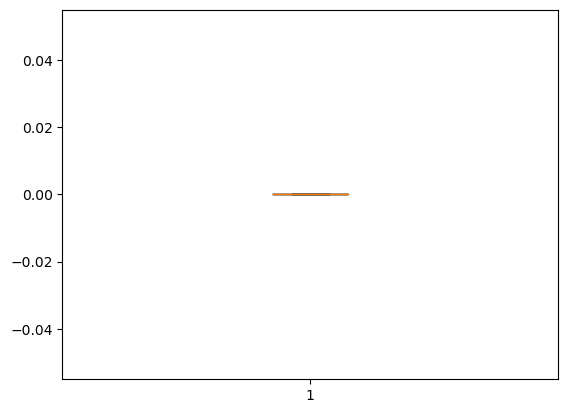

In [57]:
box3=plt.boxplot(df1['capitalloss'])
plt.show();

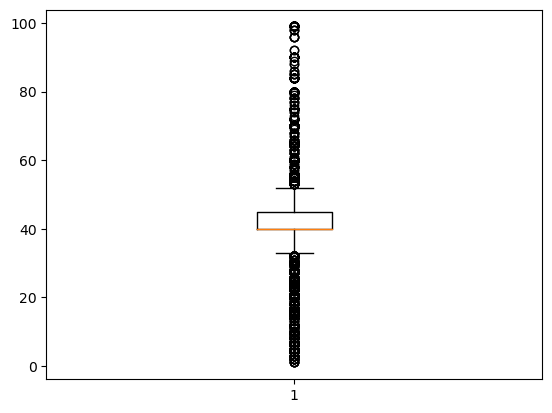

In [58]:
box4=plt.boxplot(df1['hoursperweek'])
plt.show();

In [59]:
# applying winsorization for other outliers
upper_limit=df1['hoursperweek'].quantile(0.95)
lower_limit=df1['hoursperweek'].quantile(0.05)
df1['hoursperweek']=np.where(df1['hoursperweek'] >= upper_limit,upper_limit,
    np.where(df1['hoursperweek']<= lower_limit,lower_limit,df1['hoursperweek']))

In [60]:
df1.skew()

C:\Users\PallaviJadhav\AppData\Local\Temp\ipykernel_4336\149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


age             0.468662
educationno    -0.172980
capitalgain     3.384912
capitalloss     0.000000
hoursperweek   -0.169053
dtype: float64

<Figure size 1200x600 with 0 Axes>

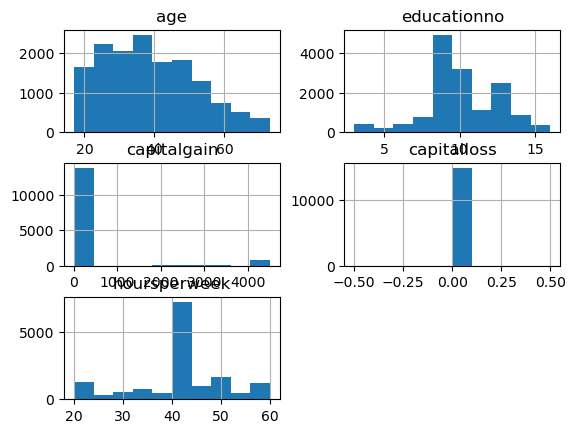

In [61]:
plt.figure(figsize=(12,6))
df1.hist()
plt.show();

In [62]:
df1['capitalgain']=np.sqrt(df1['capitalgain'])

In [63]:
df1['capitalgain']=np.sqrt(df1['capitalgain'])

In [64]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25.0,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.194,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.000,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33.0,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0.000,0.0,40.0,United-States,<=50K
15056,39.0,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.000,0.0,36.0,United-States,<=50K
15057,38.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000,0.0,50.0,United-States,<=50K
15058,44.0,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,8.194,0.0,40.0,United-States,<=50K


In [65]:
# Encoding (One hot encoding)for both train and test data-converting categorical column into numerical column
# train data
data = df.iloc[:,0:13]
data = pd.get_dummies(data)
data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39.0,13,6.828336,0.0,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50.0,13,0.000000,0.0,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.0,9,0.000000,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53.0,7,0.000000,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28.0,13,0.000000,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53.0,14,0.000000,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30155,22.0,10,0.000000,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30156,27.0,12,0.000000,0.0,38.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [66]:
#test data
data1 = df1.iloc[:,0:13]
data1 = pd.get_dummies(data1)
data1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25.0,7,0.000,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,9,0.000,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,12,0.000,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44.0,10,8.194,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,34.0,6,0.000,0.0,30.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33.0,13,0.000,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15056,39.0,13,0.000,0.0,36.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15057,38.0,13,0.000,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

# since number of columns are more, let's use PCA

In [67]:
#first Scale the train data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data_norm = sc.transform(data)
data_norm                     #Normalised dataset

array([[ 0.0056494 ,  1.114325  ,  2.66301052, ...,  0.32204111,
        -0.04836873, -0.02455004],
       [ 0.8526048 ,  1.114325  , -0.31146301, ...,  0.32204111,
        -0.04836873, -0.02455004],
       [-0.07134654, -0.47160593, -0.31146301, ...,  0.32204111,
        -0.04836873, -0.02455004],
       ...,
       [-0.91830194,  0.71784227, -0.31146301, ...,  0.32204111,
        -0.04836873, -0.02455004],
       [ 1.46857237, -0.47160593, -0.31146301, ...,  0.32204111,
        -0.04836873, -0.02455004],
       [ 1.0065967 , -0.47160593,  3.38371815, ...,  0.32204111,
        -0.04836873, -0.02455004]])

In [68]:
#Scaling the test data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data1)
data1_norm = sc.transform(data1)
data1_norm   

array([[-1.03171075, -1.27869931, -0.29041271, ...,  0.29441518,
        -0.0348003 , -0.02169377],
       [-0.04782297, -0.46703192, -0.29041271, ...,  0.29441518,
        -0.0348003 , -0.02169377],
       [-0.80465973,  0.75046916, -0.29041271, ...,  0.29441518,
        -0.0348003 , -0.02169377],
       ...,
       [-0.04782297,  1.15630286, -0.29041271, ...,  0.29441518,
        -0.0348003 , -0.02169377],
       [ 0.40627908,  1.15630286,  3.58335848, ...,  0.29441518,
        -0.0348003 , -0.02169377],
       [-0.274874  ,  1.15630286, -0.29041271, ...,  0.29441518,
        -0.0348003 , -0.02169377]])

In [69]:
# applying PCA with maximum 100 components
from sklearn.decomposition import PCA

data_pca = PCA(n_components = 100)
data_pca_values = data_pca.fit_transform(data_norm)
data_pca_values

array([[ 1.93549265e-01, -2.43649353e+00, -2.62330821e-01, ...,
        -9.41462623e-15,  3.71729638e-16,  1.24883273e-15],
       [-2.87365551e+00, -1.20041372e+00, -5.50044472e-02, ...,
        -2.97584784e-14,  9.06542370e-15, -6.67154712e-15],
       [ 8.63808615e-01,  9.02301243e-01, -1.38930947e+00, ...,
        -2.60776332e-14,  1.82628650e-14,  6.11191891e-15],
       ...,
       [ 7.44036597e-01, -1.56255864e+00, -7.43282838e-02, ...,
        -2.16199088e-16,  9.75145799e-17,  1.12819581e-17],
       [ 2.43555978e+00, -8.55536537e-01, -7.03877056e-01, ...,
         1.61607824e-16, -1.25956582e-16, -7.71477285e-17],
       [-9.17701043e-01, -1.72021777e+00, -1.61433867e-01, ...,
         7.60287293e-17,  2.60394412e-16,  5.08178125e-17]])

In [70]:
from sklearn.decomposition import PCA

data1_pca = PCA(n_components = 100)
data1_pca_values = data1_pca.fit_transform(data1_norm)
data1_pca_values

array([[ 2.24406857e+00,  2.80055963e+00,  1.79426543e-01, ...,
         1.58551700e-15, -4.88582073e-15,  1.54810001e-15],
       [-2.29356920e+00,  1.62269653e+00, -6.27302206e-01, ...,
         7.79219750e-15,  8.89907613e-15, -2.56960278e-15],
       [-2.31717093e+00, -1.15760875e+00, -2.93934936e-01, ...,
         7.05185737e-15, -2.23449961e-14, -8.27590223e-16],
       ...,
       [-2.44373639e+00, -1.51506309e+00, -2.80799564e-01, ...,
        -2.60632603e-16, -1.89868396e-16,  3.05907830e-17],
       [ 8.71130066e-01, -1.45654885e+00,  2.75985455e+00, ...,
        -4.02290112e-16,  1.06648475e-16, -5.41825564e-17],
       [-3.46164750e+00, -1.97573472e+00, -3.64105045e-01, ...,
        -1.05196167e-16, -1.65573480e-16,  4.72787693e-17]])

In [71]:
# The amount of variance that each PCA explains is 
var = data_pca.explained_variance_ratio_
var

array([4.51986043e-02, 3.02797724e-02, 2.56018160e-02, 2.33750554e-02,
       1.91770975e-02, 1.77265540e-02, 1.70340996e-02, 1.55038004e-02,
       1.43202458e-02, 1.37303591e-02, 1.32772440e-02, 1.28243122e-02,
       1.25340566e-02, 1.23324445e-02, 1.21274785e-02, 1.20971677e-02,
       1.18015864e-02, 1.17163893e-02, 1.13850480e-02, 1.12719427e-02,
       1.11445725e-02, 1.10968503e-02, 1.09834222e-02, 1.09489276e-02,
       1.08900662e-02, 1.08174512e-02, 1.07657664e-02, 1.06649062e-02,
       1.06077091e-02, 1.05193508e-02, 1.04999078e-02, 1.04821050e-02,
       1.04333921e-02, 1.03674873e-02, 1.03340458e-02, 1.03106719e-02,
       1.02350717e-02, 1.01658718e-02, 1.01164617e-02, 1.01070494e-02,
       1.00760355e-02, 1.00511345e-02, 1.00366457e-02, 1.00290401e-02,
       1.00248534e-02, 1.00202024e-02, 1.00127550e-02, 1.00099840e-02,
       1.00060824e-02, 1.00028544e-02, 9.99861330e-03, 9.99469324e-03,
       9.97542525e-03, 9.96691099e-03, 9.94886307e-03, 9.93588502e-03,
      

In [72]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 4.52,  7.55, 10.11, 12.45, 14.37, 16.14, 17.84, 19.39, 20.82,
       22.19, 23.52, 24.8 , 26.05, 27.28, 28.49, 29.7 , 30.88, 32.05,
       33.19, 34.32, 35.43, 36.54, 37.64, 38.73, 39.82, 40.9 , 41.98,
       43.05, 44.11, 45.16, 46.21, 47.26, 48.3 , 49.34, 50.37, 51.4 ,
       52.42, 53.44, 54.45, 55.46, 56.47, 57.48, 58.48, 59.48, 60.48,
       61.48, 62.48, 63.48, 64.48, 65.48, 66.48, 67.48, 68.48, 69.48,
       70.47, 71.46, 72.45, 73.44, 74.43, 75.42, 76.4 , 77.38, 78.36,
       79.34, 80.31, 81.28, 82.24, 83.2 , 84.15, 85.1 , 86.03, 86.95,
       87.87, 88.79, 89.7 , 90.58, 91.45, 92.31, 93.16, 93.97, 94.76,
       95.51, 96.25, 96.92, 97.58, 98.21, 98.75, 99.25, 99.7 , 99.95,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97])

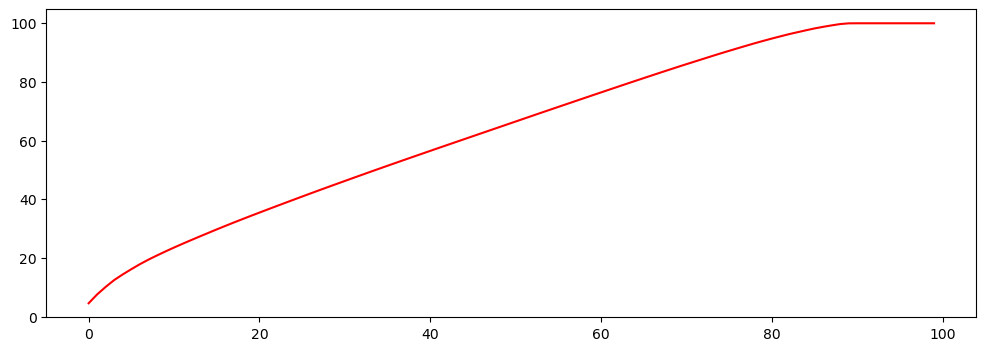

In [73]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [74]:
# Selecting first 65 PCAs out of total 102

In [75]:
# concaneting pca column with target column
final = pd.concat([pd.DataFrame(data_pca_values[:,0:65]),
                     df[['Salary']]], axis = 1)
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,Salary
0,0.193549,-2.436494,-0.262331,-1.771697,-0.096796,1.567575,0.325873,0.300610,0.966327,-0.521223,1.197613,-0.326809,-1.328838,-0.196182,0.856632,0.673370,0.105279,0.820332,-2.152981,-0.053282,-0.369944,0.795740,-1.689310,-0.970990,2.071443,0.130619,0.019182,-0.444551,0.110520,-1.440480,0.386368,0.730871,0.643414,-1.193447,-0.086081,-0.568170,0.547385,-0.412787,-0.442219,0.671694,-0.351721,-0.323554,0.102025,0.338014,-0.077228,0.086940,0.115340,0.030124,-0.140428,0.027807,-0.001576,-0.274545,-0.447874,0.197455,-0.309479,-0.507314,-0.520944,0.284615,0.152838,-0.731485,0.855589,-0.182851,0.037309,0.262775,-0.218211,<=50K
1,-2.873656,-1.200414,-0.055004,0.017214,-0.083998,0.356915,0.879008,1.108279,0.506979,2.087394,0.081041,-0.700273,-0.260061,-0.436445,-0.788443,-0.387462,-0.167968,1.586212,-0.553994,0.111605,-0.257525,-0.954295,-0.697091,0.017998,-0.345796,0.243779,-0.253364,-0.540417,-0.241904,-0.029428,-0.061515,0.306936,-0.514943,-0.198832,-0.227407,-0.626217,0.840177,-0.288278,-0.346471,0.036009,-0.155807,-0.034111,0.019769,-0.174205,-0.034246,0.017229,0.020017,0.122998,-0.019442,0.062215,0.111115,0.022892,-0.053118,-0.172312,-0.024998,-0.580617,-0.230489,-0.115567,0.394065,0.076294,-0.420702,-0.149842,0.276697,0.004764,0.001992,<=50K
2,0.863809,0.902301,-1.389309,-0.024046,0.509953,1.133350,-2.289355,-0.132350,-0.803634,-1.188654,0.882236,-0.393288,0.212751,-0.279215,0.992929,0.024464,-0.238662,0.089699,0.643651,-0.892593,0.661554,-0.257784,-0.515443,0.806969,-0.148690,0.540381,0.579604,0.601478,1.126416,-1.675289,-0.309424,-0.967342,-0.501363,0.767176,-1.449537,-0.910781,0.280761,0.865601,-0.296665,-1.142377,-0.350320,0.033252,-0.041856,-0.166659,0.049837,-0.134546,-0.100641,-0.080576,-0.110982,-0.342342,-0.293124,0.073158,0.591277,-0.328992,-0.124119,-0.446519,-0.008918,-0.615569,0.294926,0.181125,-0.298283,0.728352,0.764483,-1.177526,1.112455,<=50K
3,-0.684400,2.722503,0.597673,0.451653,-2.858605,-0.583734,-0.264166,-2.264634,-0.570170,0.526722,-1.522643,-0.834918,0.011773,-0.728780,0.671347,0.055575,0.457423,1.620977,1.242798,-1.554289,0.952686,-0.462719,-0.957021,1.717036,0.021965,0.910942,0.689366,1.163608,0.287835,-2.320717,0.287259,1.529574,-1.117635,-0.307539,-0.700995,0.161644,0.965556,1.399243,0.516596,-1.405647,-0.476993,0.112352,0.046326,-0.454554,0.074055,-0.193571,-0.170921,-0.142647,-0.039596,-0.226932,-0.066243,0.448555,0.485333,-0.759053,0.269161,-1.005532,-0.090324,0.026470,0.259569,-0.046373,-0.021205,-0.154056,-0.083145,-1.310003,2.058948,<=50K
4,1.037045,-1.571295,4.417579,0.981302,1.053201,-2.484725,2.045479,-2.477159,0.201820,2.220139,1.564856,0.422485,0.459713,0.133999,-1.901051,1.809637,0.492968,-0.186529,0.455435,-3.496141,-0.484454,-0.133994,0.191762,-0.787674,-0.506439,-1.835290,1.379583,0.365626,-1.762203,0.572851,-0.998218,-2.561273,1.472925,-1.414237,-3.115171,3.535787,-0.800546,-1.767351,-2.312492,2.806865,-2.095690,-0.569414,-2.840754,-7.625396,-1.461974,-1.693553,-2.187751,0.824788,2.262896,-0.709712,4.210040,1.217932,-2.929679,0.675542,-3.016470,-0.947372,1.809470,-2.668022,2.608829,-4.091910,-0.193448,0.457620,-4.260810,-3.106331,1.903139,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50K
30155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [76]:
# droping null values
final=final.dropna()

In [77]:
final1 = pd.concat([pd.DataFrame(data1_pca_values[:,0:65]),
                     df1[['Salary']]], axis = 1)
final1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,Salary
0,2.244069,2.800560,0.179427,-1.913360,-3.329581,0.168615,-0.603774,-1.622568,0.475787,-2.152658,-0.054529,-0.385790,-0.197614,-0.180447,0.137300,-0.718031,0.686783,-1.087177,0.350610,-0.179526,-0.833481,-1.631013,-0.823049,-0.375375,0.725695,-0.831556,1.269382,1.455785,0.398170,-0.258773,0.720992,-0.380362,1.928998,1.090191,-0.300137,1.907547,-0.410677,0.541522,-0.285683,0.186855,0.038146,0.223510,0.574622,-0.100939,-0.081451,0.176792,0.058901,-0.070530,0.255900,-0.302029,0.217784,-0.005933,0.368544,0.457349,0.650797,0.330245,0.564253,0.773981,0.025270,-1.284532,-0.114330,-0.354718,0.123637,0.831801,0.343616,<=50K
1,-2.293569,1.622697,-0.627302,0.549529,0.001995,0.438482,-0.159641,1.105857,0.212976,-0.683474,0.913906,0.663277,-1.354019,0.761638,-0.335016,-0.548396,0.128536,-0.619204,-0.358683,-0.637434,-0.577269,0.156134,1.770905,-0.003542,0.258421,-0.310898,-0.171181,0.192862,-0.488155,-1.011396,0.273949,-0.140416,0.031062,-0.262318,-0.156172,-0.112734,0.089198,0.208809,0.654497,-0.245069,0.203763,-0.561131,-0.586515,-0.118038,0.009545,-0.033801,-0.069211,0.068904,-0.007024,0.494062,-0.141227,-0.169227,-0.300566,-0.037470,0.152810,-0.137203,-0.605750,-0.149113,0.054218,-0.149390,-0.947461,-0.141571,-0.506782,-0.088954,0.015296,<=50K
2,-2.317171,-1.157609,-0.293935,-0.150005,-2.010813,2.394686,0.329649,-0.878842,-0.449944,3.487951,-0.786305,-1.987778,1.995573,2.248241,-2.386290,1.055285,0.489819,-1.250482,-1.342423,1.105188,0.528912,-0.524662,1.301378,0.889919,2.698943,-0.272151,0.109375,1.029359,-0.407954,2.393880,-0.446535,1.938310,0.769464,-0.627656,-1.493456,0.483058,0.247399,-0.244778,-0.017241,0.711205,0.066092,-0.029573,0.220665,0.042625,0.236595,-0.350727,0.076945,-0.147689,0.123739,-0.313697,0.543839,-0.040166,-0.082352,-0.606753,0.902471,0.052219,-0.421145,-0.181535,0.589345,-0.817309,0.276217,-0.411156,0.920847,-0.596383,0.795448,>50K
3,-1.342831,1.053358,1.241467,0.256045,-2.933333,-1.728510,-0.001707,-1.922374,-0.916853,-1.103306,-1.015015,-0.384477,-1.023147,-1.348252,0.804745,-0.628771,-1.222394,-1.108450,-1.244765,0.441355,-0.880603,-1.633936,-0.628669,0.140741,0.166241,0.214595,1.052133,0.809543,-0.108200,0.086849,1.076734,0.177947,0.563093,0.557441,-0.163459,-0.188774,-0.440164,-0.852449,0.038491,-0.037940,0.467081,0.299251,0.012610,-0.150392,0.084124,-0.080880,-0.010630,-0.059814,0.052460,-0.079922,0.009910,0.200734,0.139843,0.509773,0.089983,-0.007732,0.312139,0.035155,-0.047183,-0.139795,-0.679938,-0.075852,-0.315830,-0.193103,0.537616,>50K
4,1.809923,1.980307,-1.086932,-0.423335,0.502955,1.104626,-0.859976,0.263714,0.922347,-1.124565,-1.301877,-1.861185,0.257490,-0.870989,0.265929,-0.743181,0.983993,-0.079179,-0.275537,-0.822527,1.261138,1.704146,-1.321417,0.363287,-0.666893,0.011584,-1.341323,1.315438,1.450576,1.855511,0.588858,0.413829,-1.230087,-1.715005,0.037155,-0.539937,-0.217631,0.292835,0.541538,-0.861586,0.214322,-0.416811,0.012855,0.205022,-0.184768,0.095852,-0.033229,0.056315,-0.218005,0.119029,-0.060481,-0.570060,-0.266832,-0.959055,-0.069744,0.086170,0.983543,-0.845666,-0.475172,0.290558,0.402541,-0.115544,-0.264447,-1.534803,-0.852716,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<=50K
15056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [78]:
final1=final1.dropna()

In [79]:
#Since the training dataset is huge, we'll use some part of it for the training purpose, to reduce time consumed.
array = final.values  # converting into array form
X = array[0:1000,0:65]
Y = array[0:1000,65]

- Since the training and test datasets are separately given in the problem, so we'll use them separately for model validation

## SVM Classification

In [80]:
# SVM Classification

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.1,0.5],'C':[1,10] },
              {'kernel':['linear'],'C':[1,10]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 1, 'kernel': 'linear'}, 0.74)

In [82]:
#Since the testing dataset is huge, we'll use some part of it for the test purpose, to reduce the time consumed.
x = final1.values[0:1000,0:65]
y = final1.values[0:1000,65] 

In [83]:
#SVM Clasification
clf = SVC(C=1, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))

0.761


Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

## Bagging

In [84]:
#importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(n_estimators=100, random_state=7)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.998


## Random Forest

In [85]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.997


## Boosting

In [87]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100, random_state=7)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.867


Hence, we can say that Bagging/Random Forest- any of them is equally best predicting model for this dataset